In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score, classification_report
from sklearn.metrics import average_precision_score

In [224]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
print("Data Shape:",df.shape) 
df.head(10) 

Data Shape: (13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.29,208.18,173.89,1.20,0.55,28715,190.14,0.76,0.99,0.96,0.91,0.01,0.00,0.83,1.00,SEKER
1,28734,638.02,200.52,182.73,1.10,0.41,29172,191.27,0.78,0.98,0.89,0.95,0.01,0.00,0.91,1.00,SEKER
2,29380,624.11,212.83,175.93,1.21,0.56,29690,193.41,0.78,0.99,0.95,0.91,0.01,0.00,0.83,1.00,SEKER
3,30008,645.88,210.56,182.52,1.15,0.50,30724,195.47,0.78,0.98,0.90,0.93,0.01,0.00,0.86,0.99,SEKER
4,30140,620.13,201.85,190.28,1.06,0.33,30417,195.90,0.77,0.99,0.98,0.97,0.01,0.00,0.94,1.00,SEKER
5,30279,634.93,212.56,181.51,1.17,0.52,30600,196.35,0.78,0.99,0.94,0.92,0.01,0.00,0.85,1.00,SEKER
6,30477,670.03,211.05,184.04,1.15,0.49,30970,196.99,0.76,0.98,0.85,0.93,0.01,0.00,0.87,1.00,SEKER
7,30519,629.73,213.00,182.74,1.17,0.51,30847,197.12,0.77,0.99,0.97,0.93,0.01,0.00,0.86,1.00,SEKER
8,30685,635.68,213.53,183.16,1.17,0.51,31044,197.66,0.77,0.99,0.95,0.93,0.01,0.00,0.86,1.00,SEKER
9,30834,631.93,217.23,180.90,1.20,0.55,31120,198.14,0.78,0.99,0.97,0.91,0.01,0.00,0.83,1.00,SEKER


In [225]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00
mean,53048.28,855.28,320.14,202.27,1.58,0.75,53768.20,253.06,0.75,0.99,0.87,0.80,0.01,0.00,0.64,1.00
std,29324.10,214.29,85.69,44.97,0.25,0.09,29774.92,59.18,0.05,0.00,0.06,0.06,0.00,0.00,0.10,0.00
min,20420.00,524.74,183.60,122.51,1.02,0.22,20684.00,161.24,0.56,0.92,0.49,0.64,0.00,0.00,0.41,0.95
25%,36328.00,703.52,253.30,175.85,1.43,0.72,36714.50,215.07,0.72,0.99,0.83,0.76,0.01,0.00,0.58,0.99
50%,44652.00,794.94,296.88,192.43,1.55,0.76,45178.00,238.44,0.76,0.99,0.88,0.80,0.01,0.00,0.64,1.00
75%,61332.00,977.21,376.50,217.03,1.71,0.81,62294.00,279.45,0.79,0.99,0.92,0.83,0.01,0.00,0.70,1.00
max,254616.00,1985.37,738.86,460.20,2.43,0.91,263261.00,569.37,0.87,0.99,0.99,0.99,0.01,0.00,0.97,1.00


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [227]:
for column in df.columns:
    print(column,df[column].nunique())

Area 12011
Perimeter 13416
MajorAxisLength 13543
MinorAxisLength 13543
AspectRation 13543
Eccentricity 13543
ConvexArea 12066
EquivDiameter 12011
Extent 13535
Solidity 13526
roundness 13543
Compactness 13543
ShapeFactor1 13543
ShapeFactor2 13543
ShapeFactor3 13543
ShapeFactor4 13543
Class 7


In [228]:
df.drop_duplicates(inplace=True)

In [229]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [230]:
print(df.Class)

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13543, dtype: object


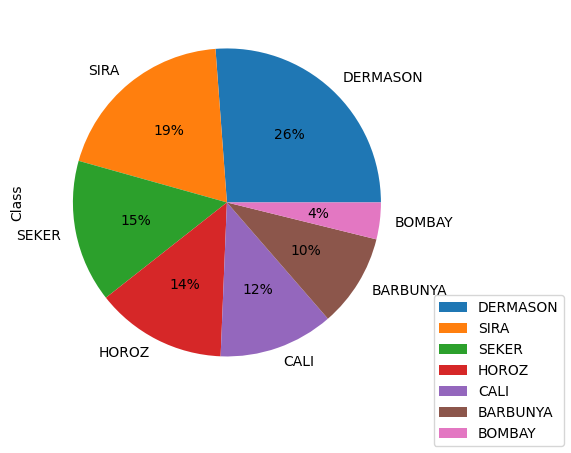

In [231]:
plt.figure(figsize=(7, 5))
pie = df.Class.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
#plt.savefig("graphs/classdistribution.jpg")
plt.show()

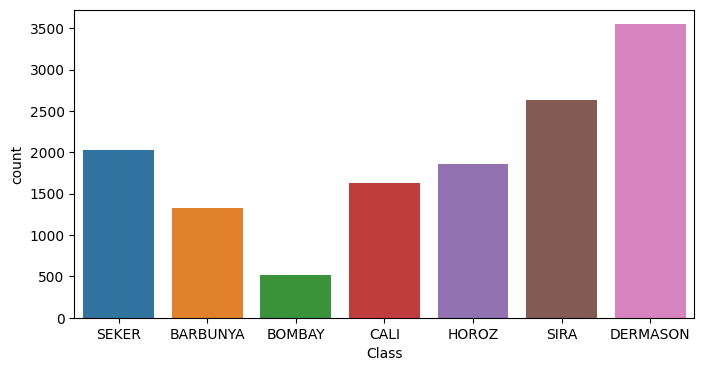

In [232]:
plt.figure(figsize=(8,4))
sns.countplot(x='Class',data=df)
plt.show()

In [233]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value")

No missing value


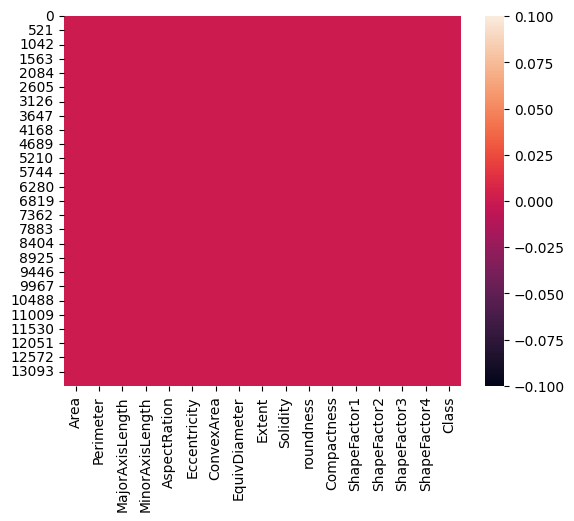

In [234]:
sns.heatmap(df.isnull())
plt.show()

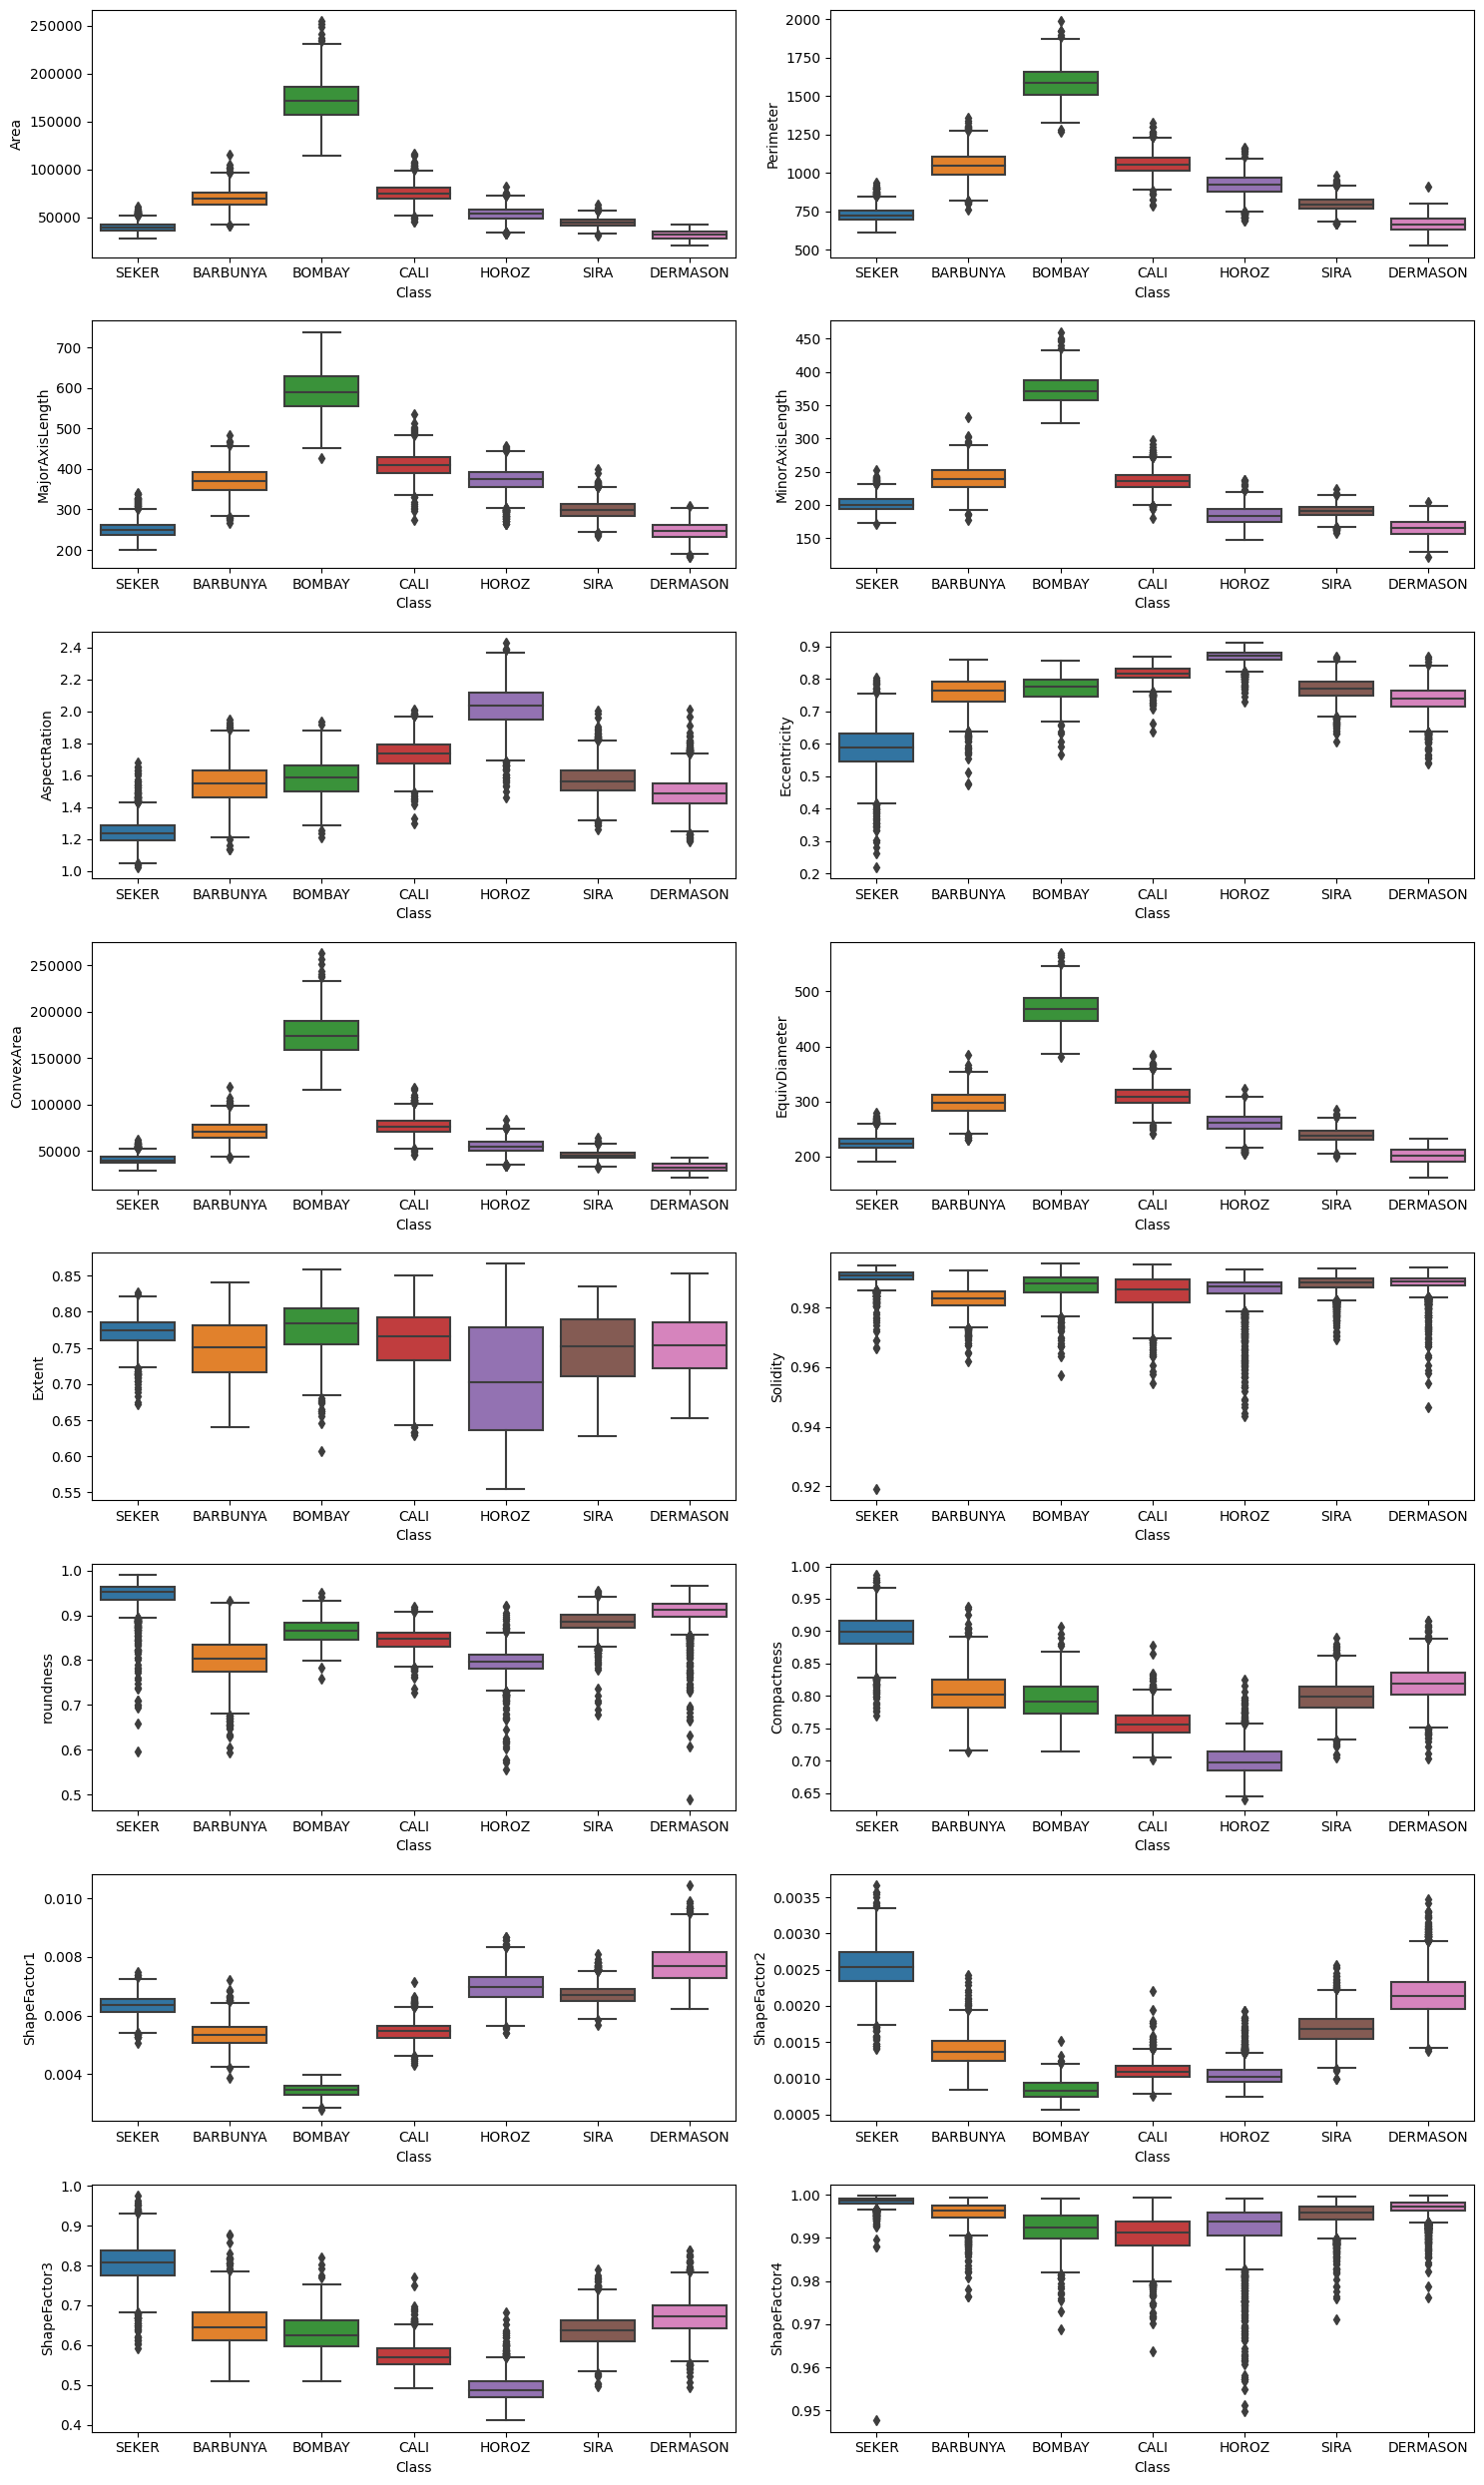

In [235]:
Numeric_cols = df.drop(columns=['Class']).columns
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot)
plt.tight_layout()

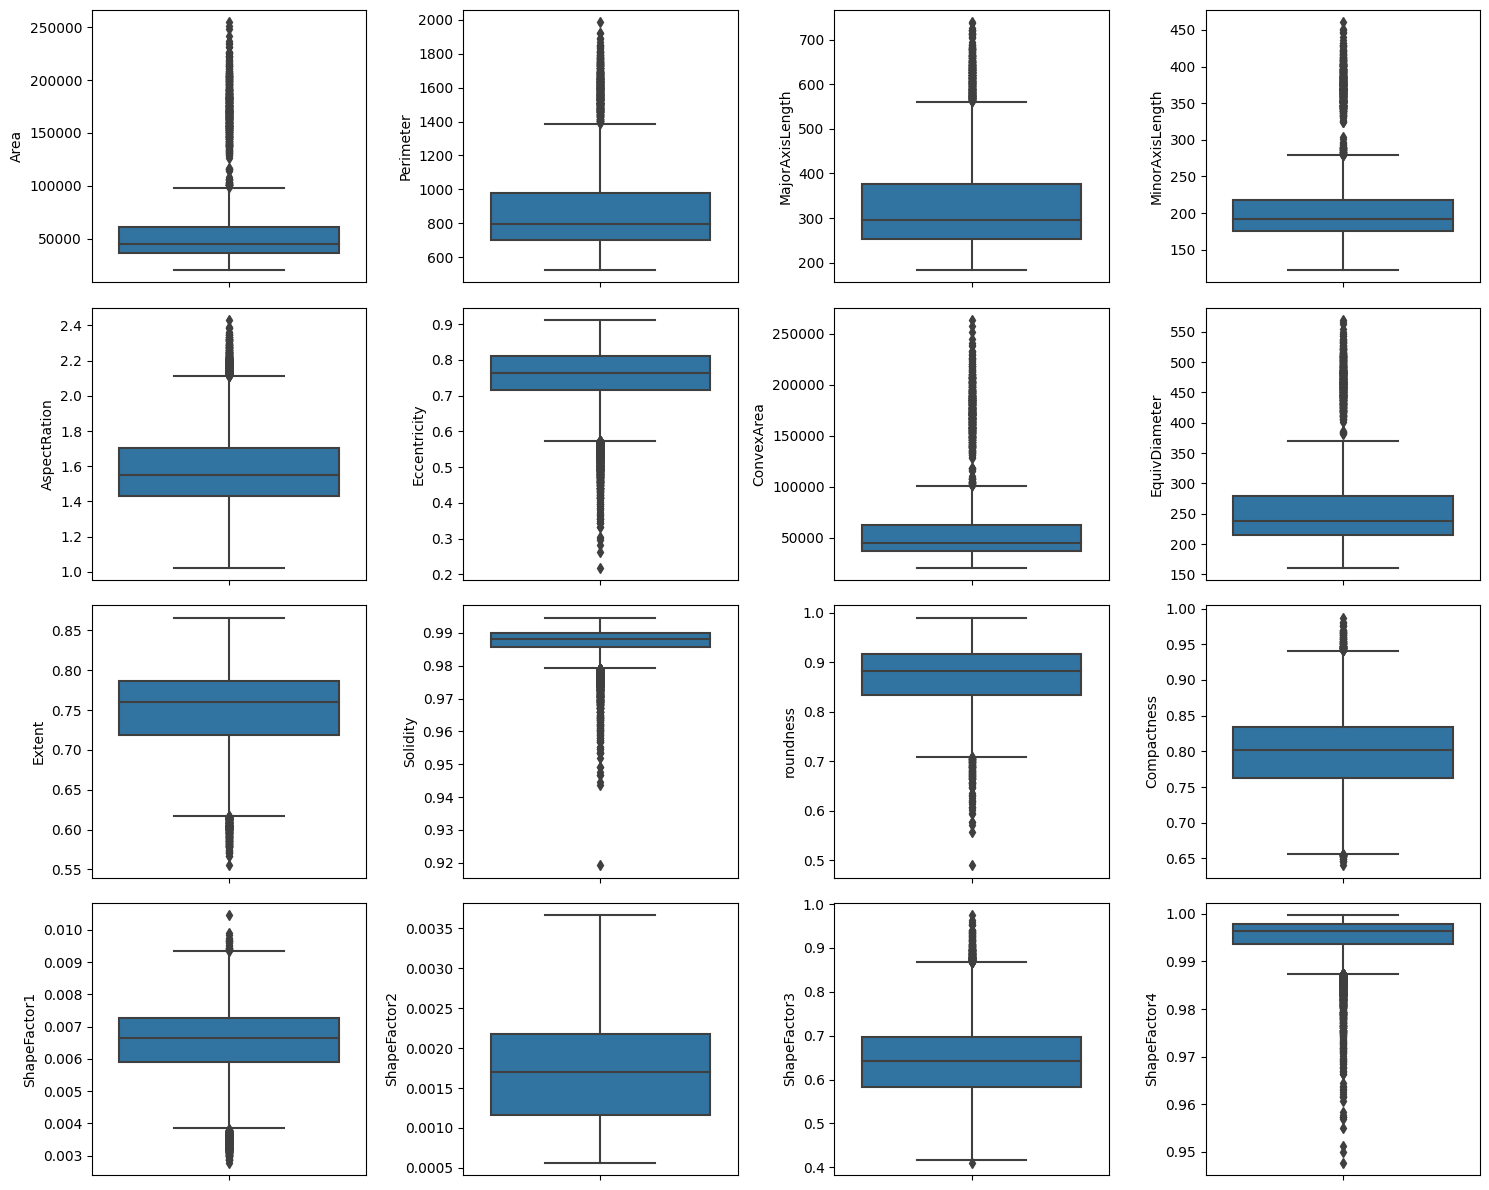

In [236]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

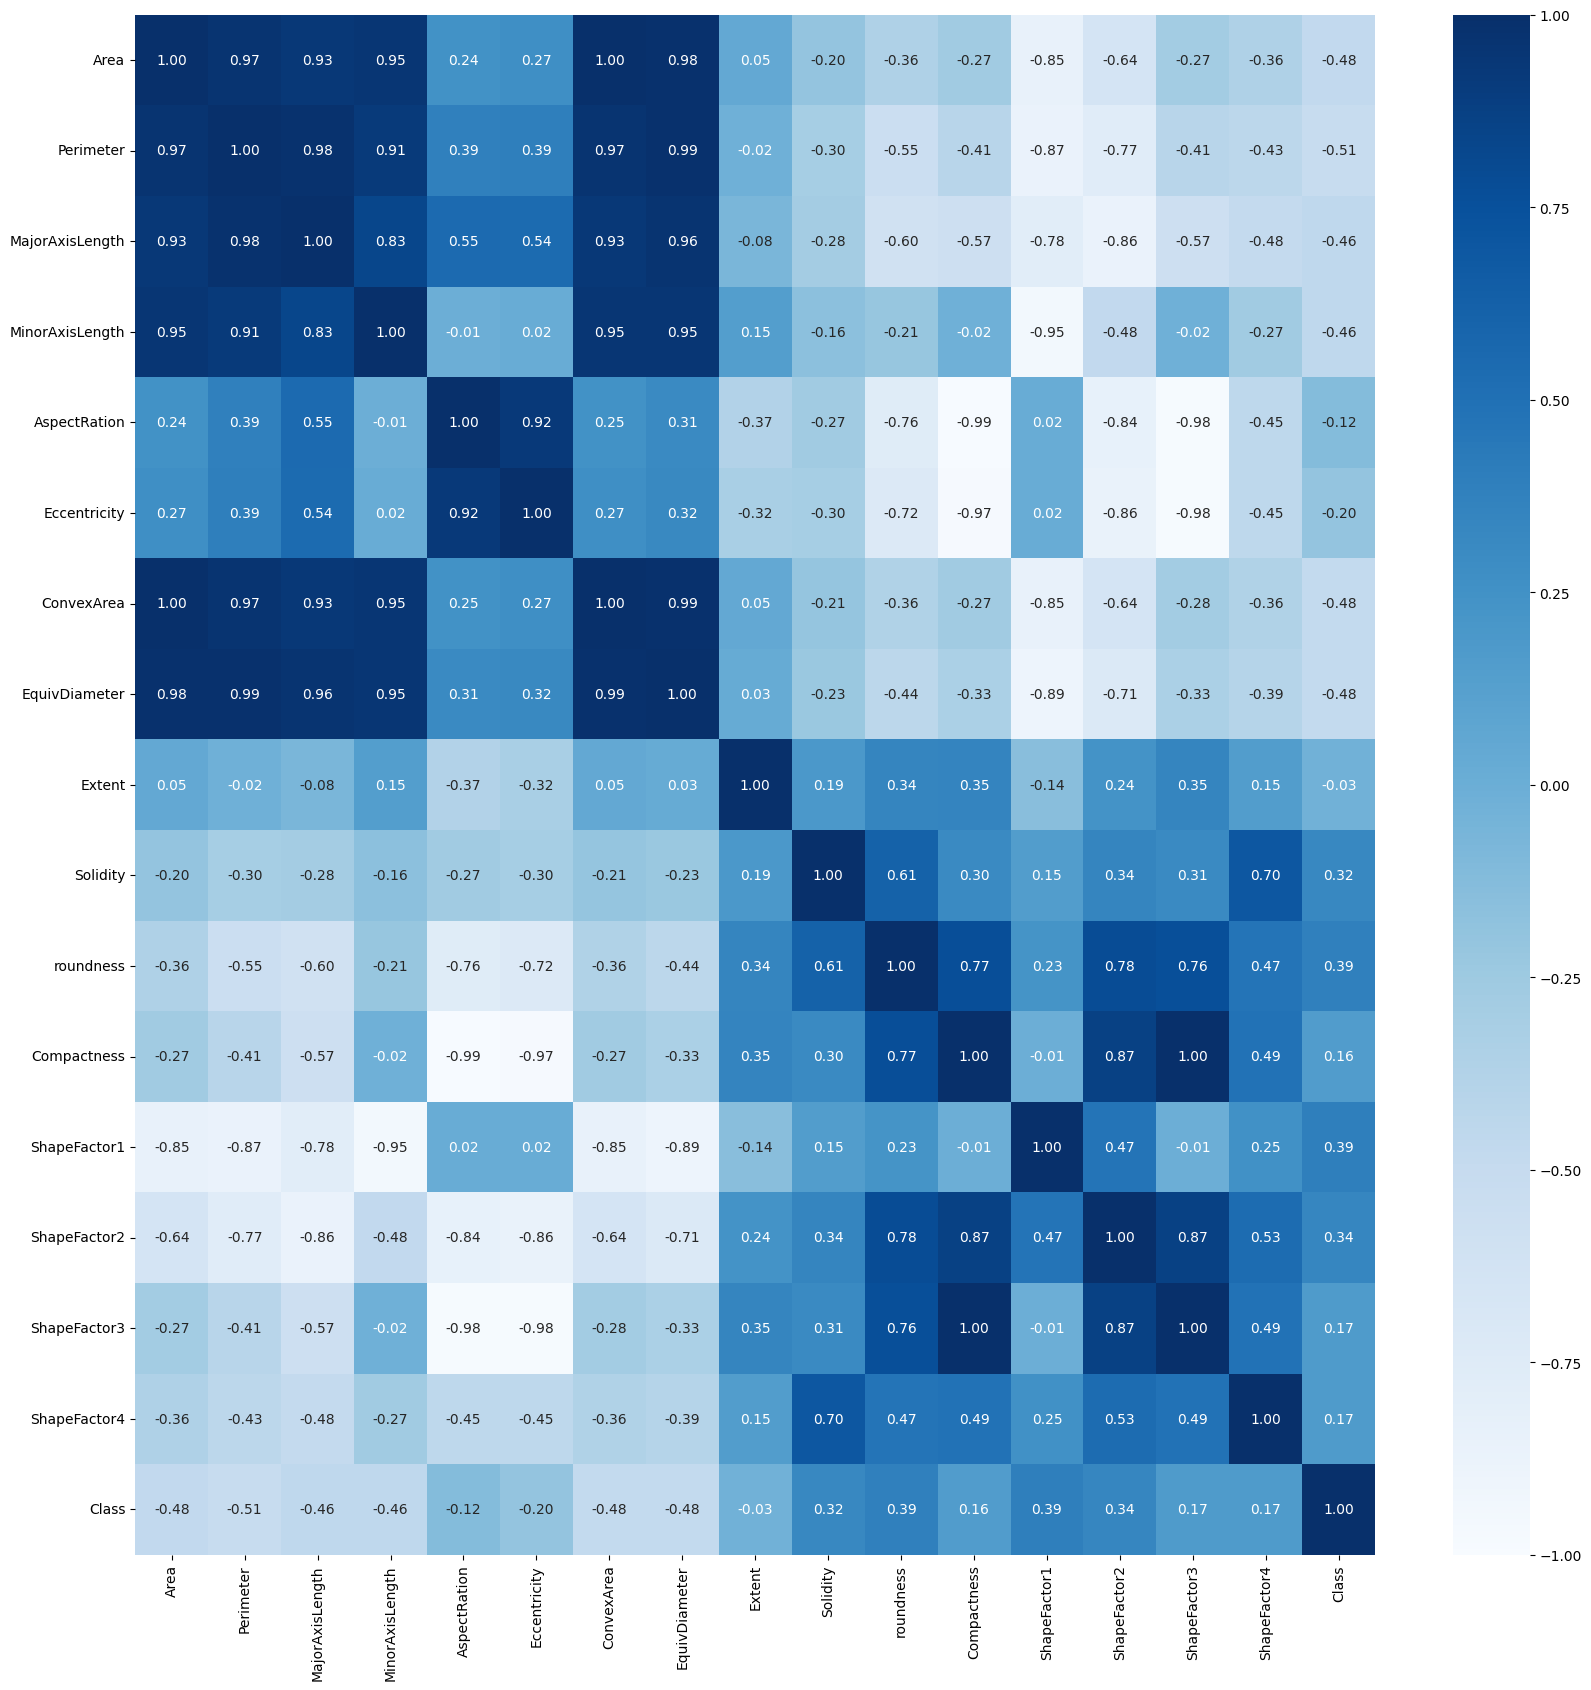

In [237]:
labelencoder = LabelEncoder()
#df['Class'] = labelencoder.fit_transform(df['Class'])
df.Class=labelencoder.fit_transform(df.Class)
df.head()

plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), 
            annot = True, 
            cmap = "Blues",
            fmt = ".2f",
            vmin = -1.00, vmax = 1.00)
plt.show()

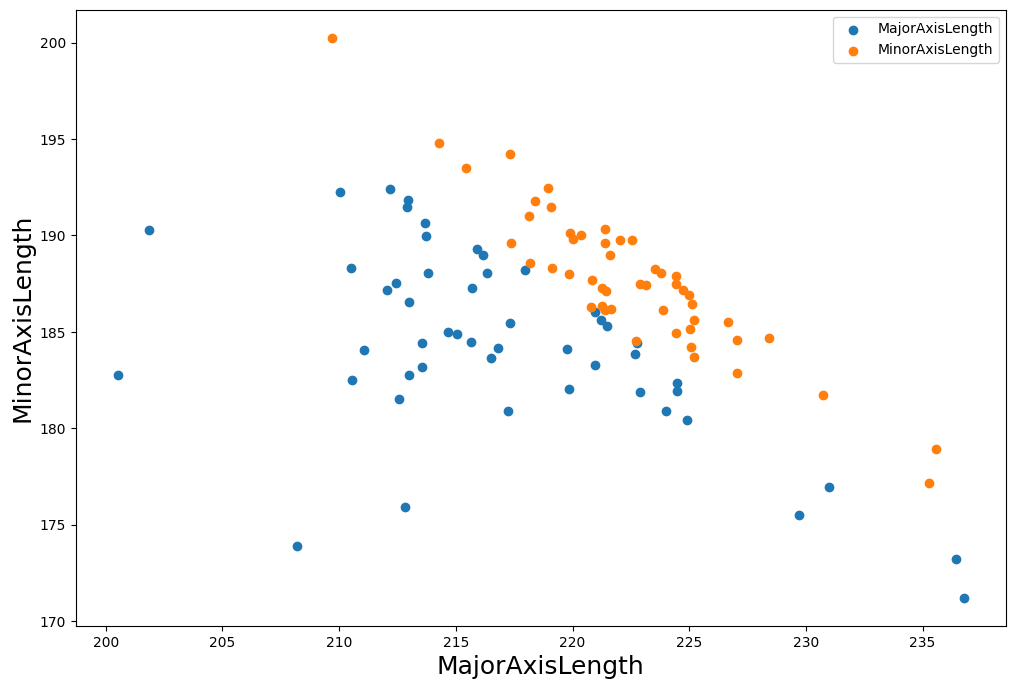

In [238]:

plt.figure(figsize=(12, 8))
plt.scatter(df[:50]['MajorAxisLength'], df[:50]['MinorAxisLength'], label='MajorAxisLength')
plt.scatter(df[50:100]['MajorAxisLength'], df[50:100]['MinorAxisLength'], label='MinorAxisLength')
plt.xlabel('MajorAxisLength', fontsize=18)
plt.ylabel('MinorAxisLength', fontsize=18)
plt.legend()

plt.show()

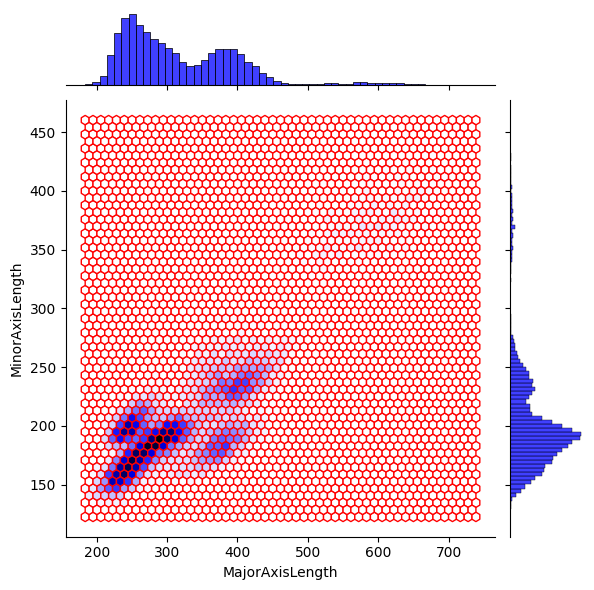

In [239]:
sns.jointplot(x='MajorAxisLength',y='MinorAxisLength',data=df,kind='hex',dropna=True,color="blue",edgecolor="red")
plt.show()

In [240]:
# sns.pairplot(data=df)
# plt.show()

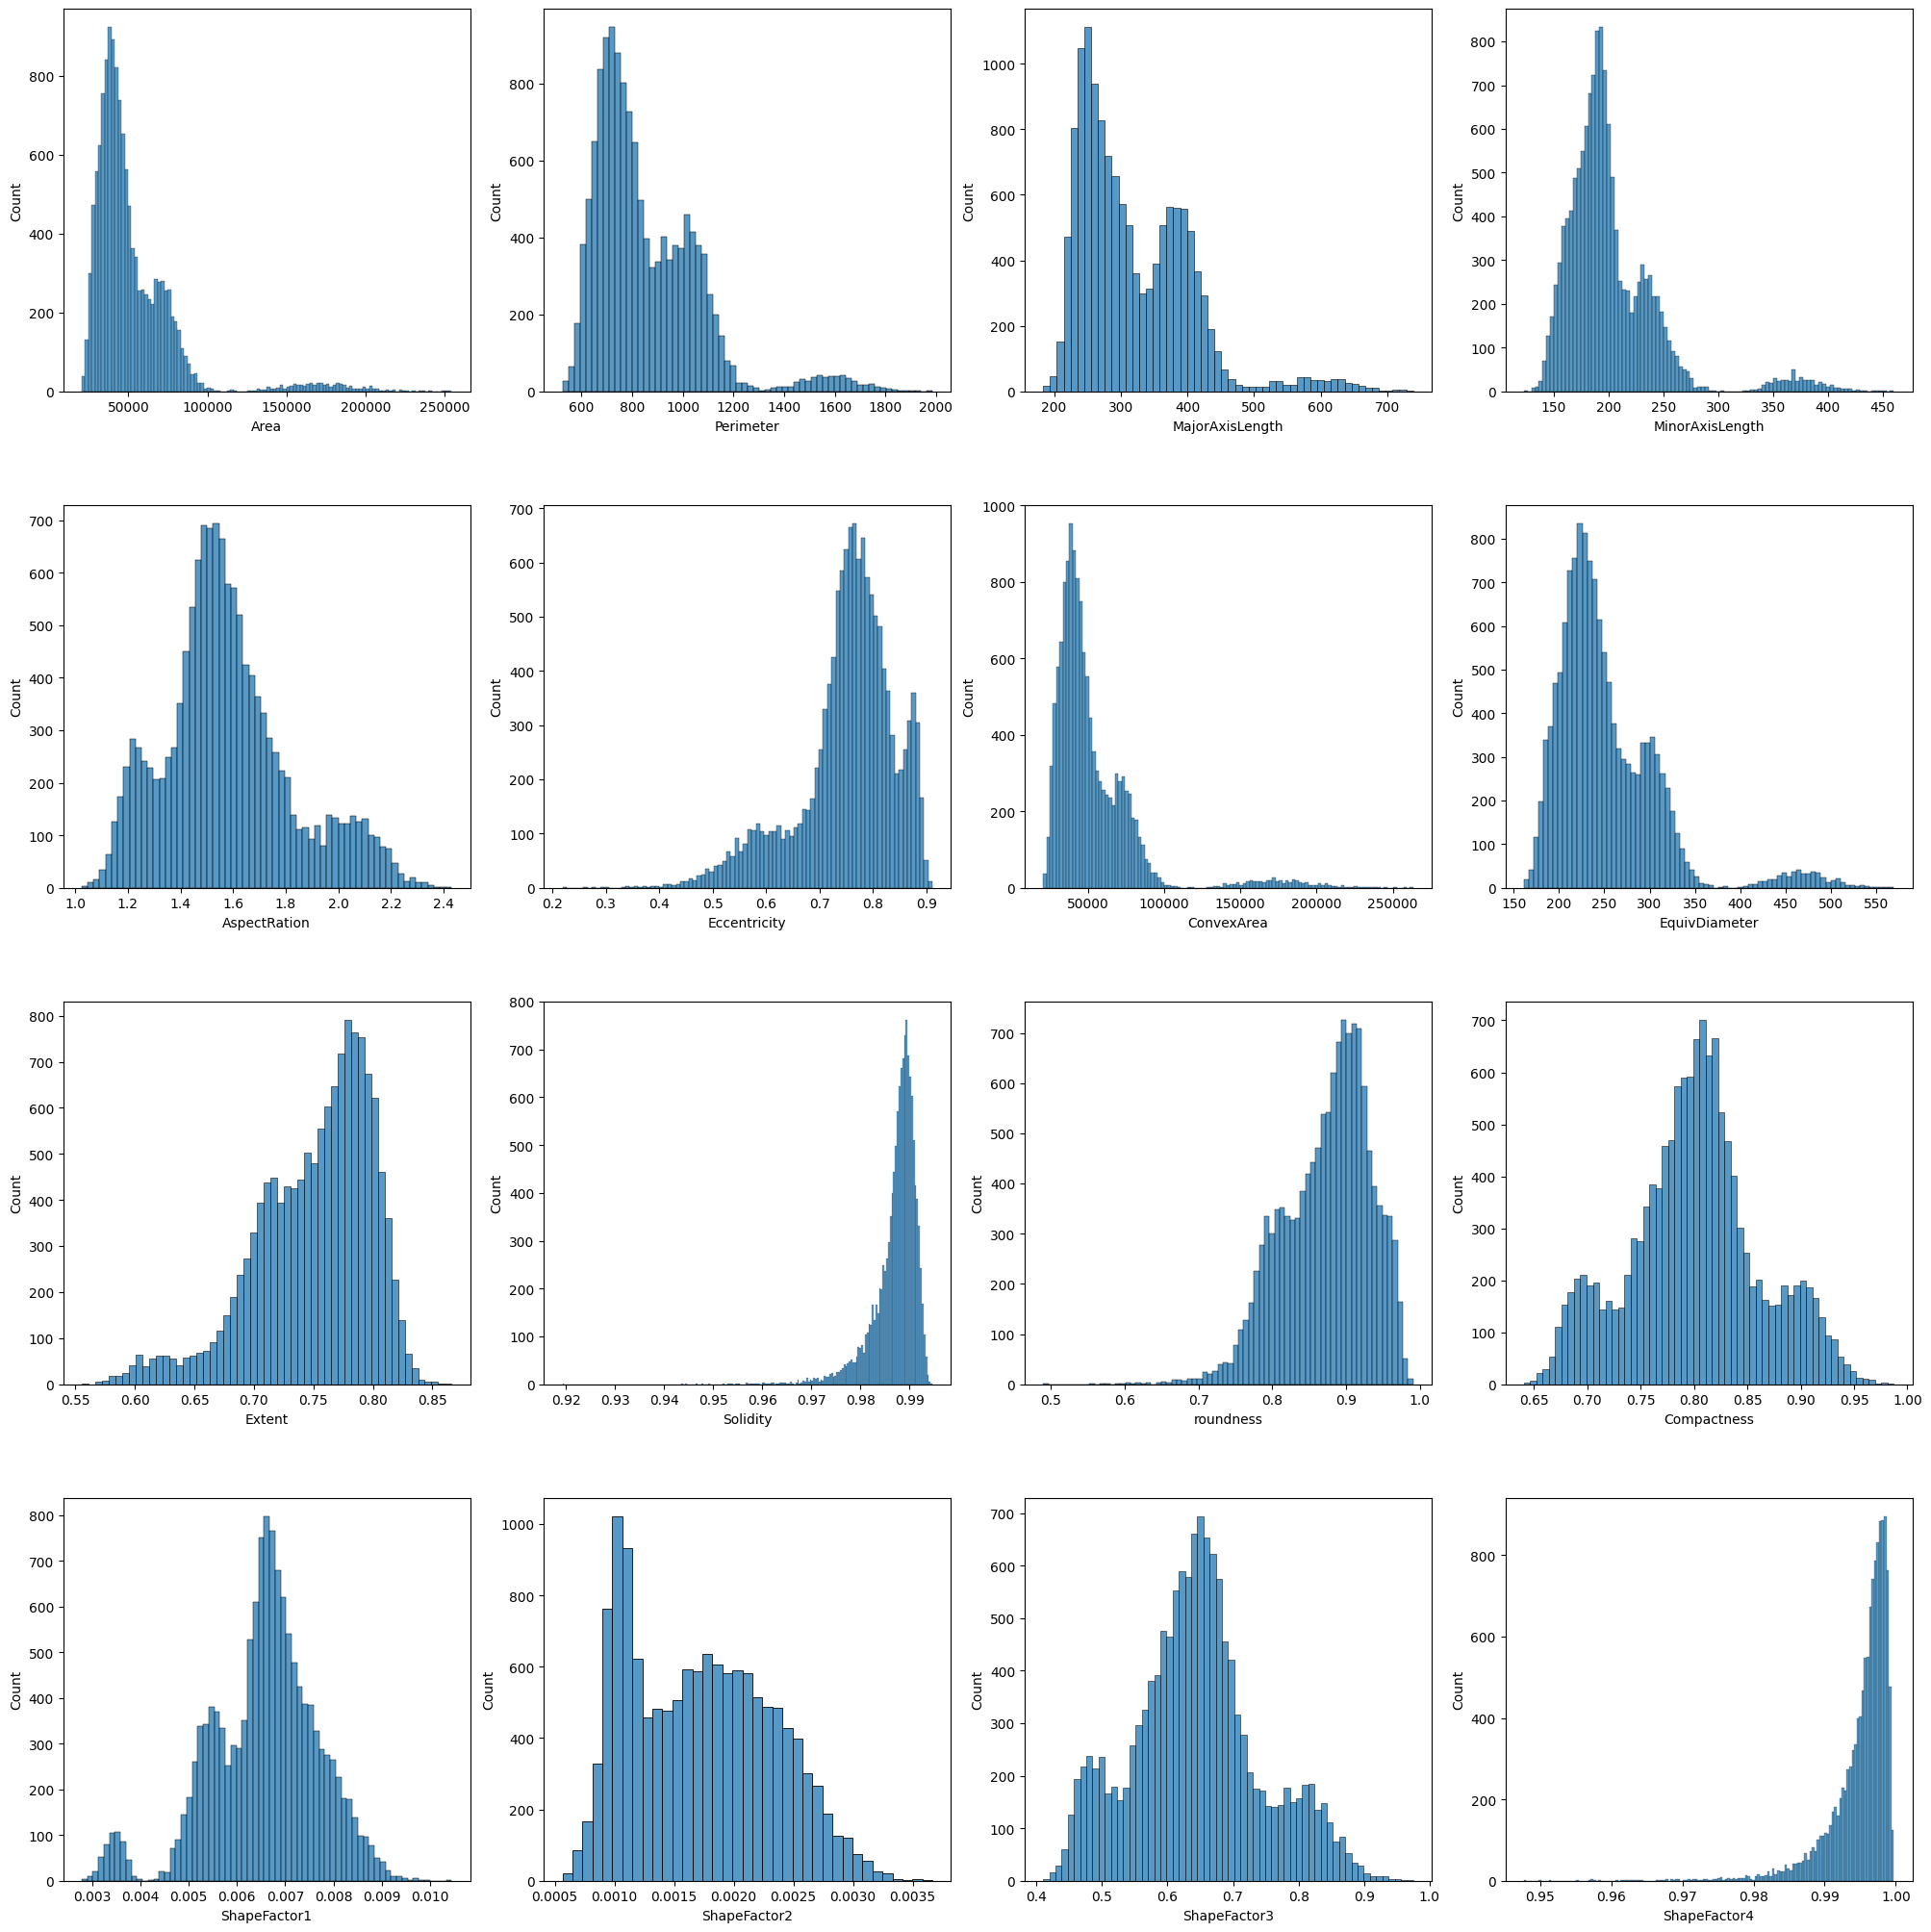

In [241]:
X = df.drop(['Class'], axis=1)
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in X.items():
     sns.histplot(v, ax = axs[index])
     index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

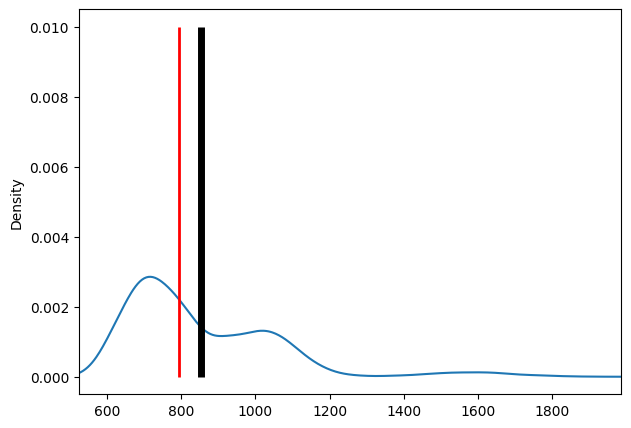

In [242]:
skewplot = df.Perimeter.plot(kind="density",
              figsize=(7,5),
              xlim=(df.Perimeter.min(),df.Perimeter.max()));
plt.vlines(df.Perimeter.mean(), 
           ymin=0, 
           ymax=0.01,
           linewidth=5.0,
           color="black");
plt.vlines(df.Perimeter.median(),
           ymin=0, 
           ymax=0.01, 
           linewidth=2.0,
           color="red");

plt.show()

## Detekcija Outliera

Area
Skewness :  2.947


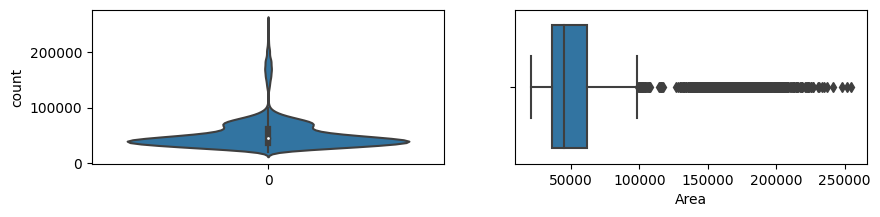

Perimeter
Skewness :  1.628


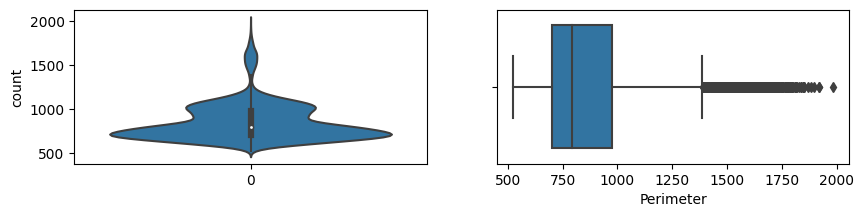

MajorAxisLength
Skewness :  1.366


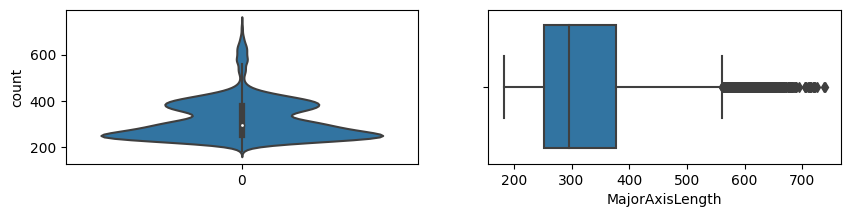

MinorAxisLength
Skewness :  2.232


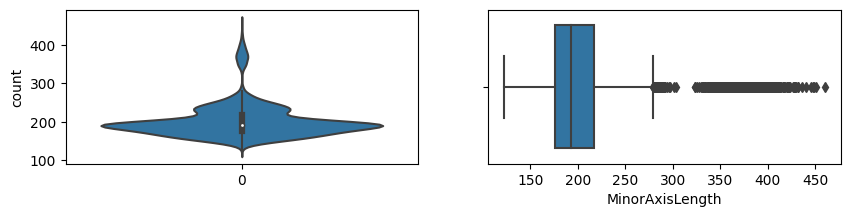

AspectRation
Skewness :  0.589


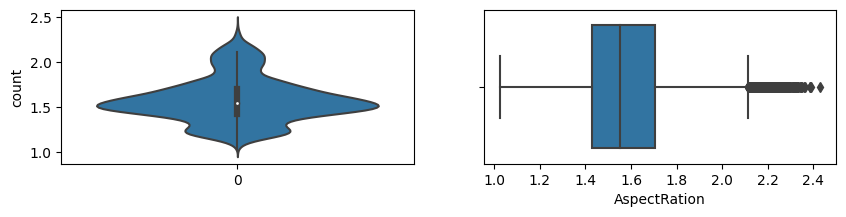

Eccentricity
Skewness :  -1.065


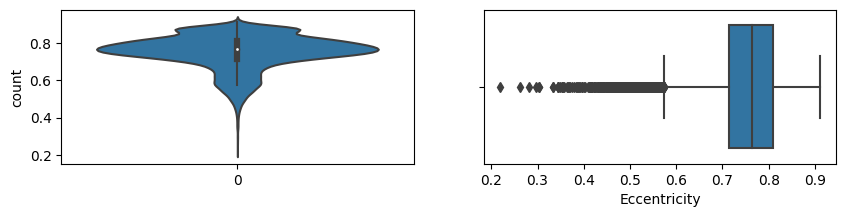

ConvexArea
Skewness :  2.936


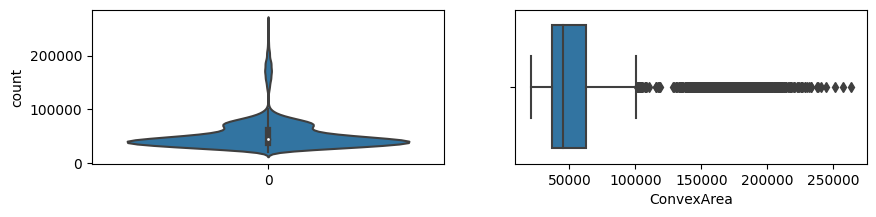

EquivDiameter
Skewness :  1.947


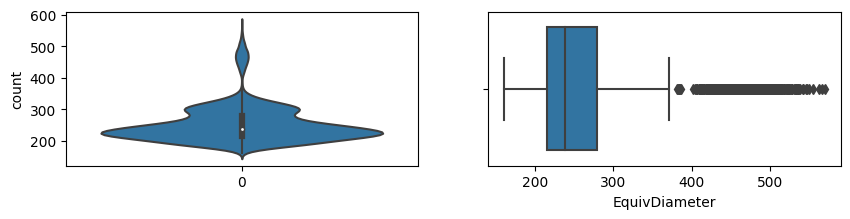

Extent
Skewness :  -0.896


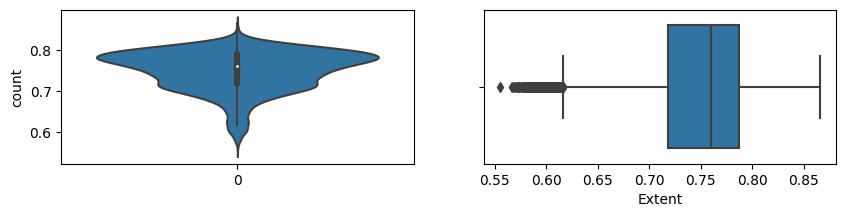

Solidity
Skewness :  -2.547


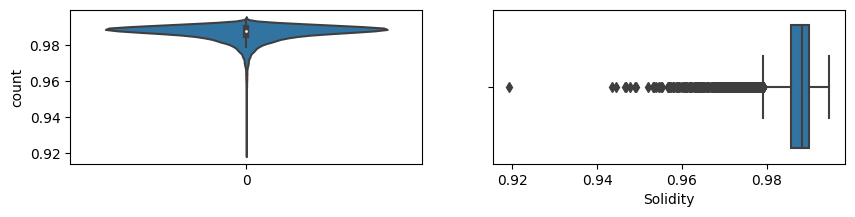

roundness
Skewness :  -0.649


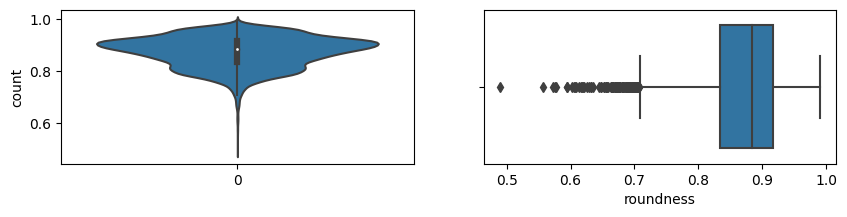

Compactness
Skewness :  0.036


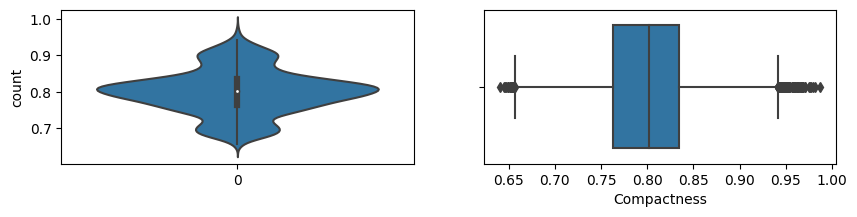

ShapeFactor1
Skewness :  -0.53


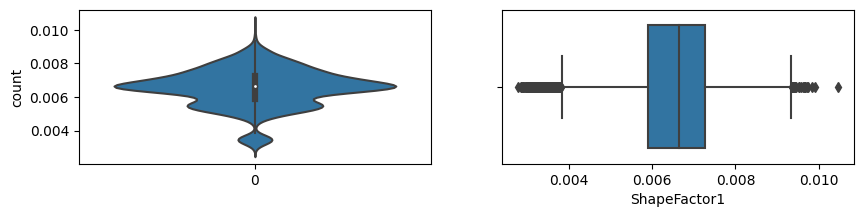

ShapeFactor2
Skewness :  0.294


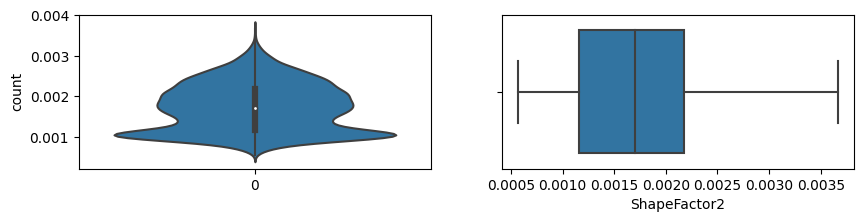

ShapeFactor3
Skewness :  0.243


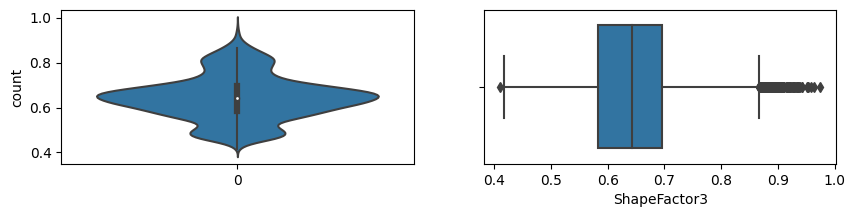

ShapeFactor4
Skewness :  -2.76


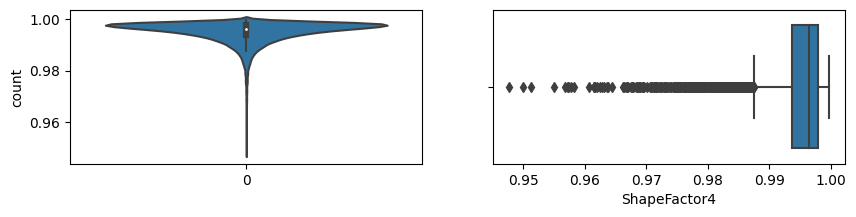

In [243]:
for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.figure(figsize=(10,2))
        plt.subplot(1,2,1)
        sns.violinplot(df[i])
        plt.ylabel('count')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[i])
        plt.show()    

## Izbacivanje Outliera

In [244]:
#Creating Function to remove Outliers 

def remove_outliers(df):
    for col in df.columns:
        if col != 'Class':
            q25 = np.percentile(df[col] , 25)
            q75 = np.percentile(df[col] , 75)
            iqr = q75 - q25
            cut_off = iqr * 1.5
            lo = q25 - cut_off
            up = q75 + cut_off
            df[col] = df[col].clip(upper = up)
            df[col] = df[col].clip(lower=lo)

In [245]:
# Function calling

remove_outliers(df)

Area
Skewness :  0.962


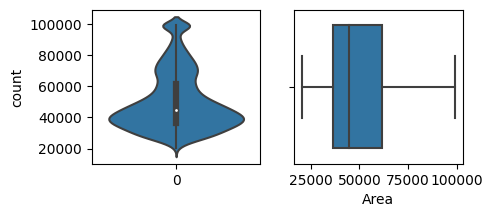

Perimeter
Skewness :  0.966


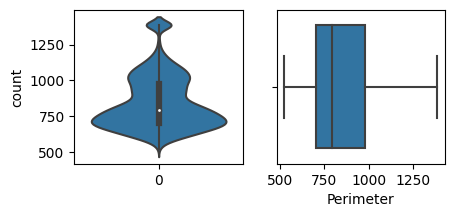

MajorAxisLength
Skewness :  0.979


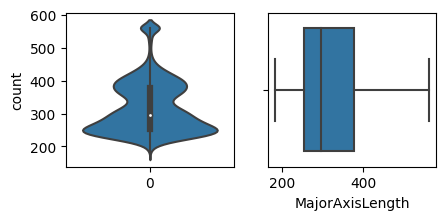

MinorAxisLength
Skewness :  0.729


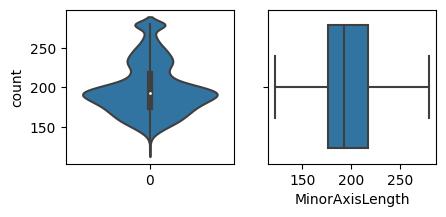

AspectRation
Skewness :  0.47


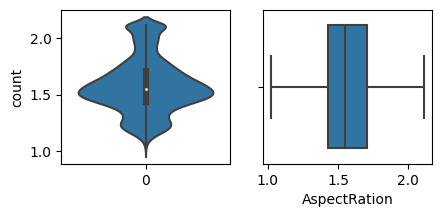

Eccentricity
Skewness :  -0.614


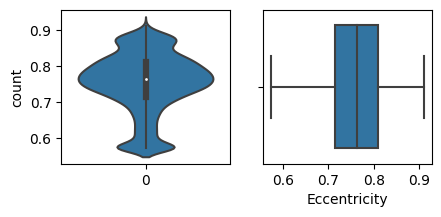

ConvexArea
Skewness :  0.969


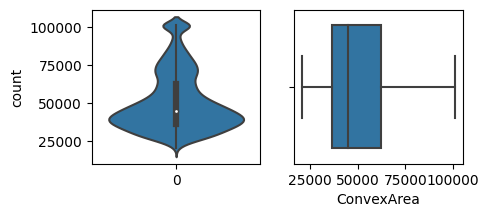

EquivDiameter
Skewness :  0.84


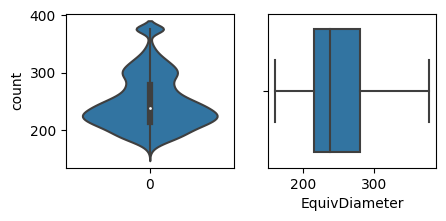

Extent
Skewness :  -0.782


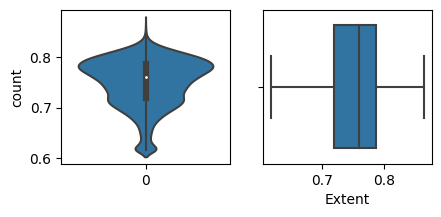

Solidity
Skewness :  -0.844


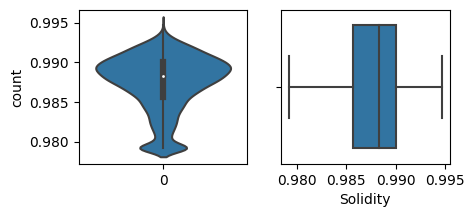

roundness
Skewness :  -0.497


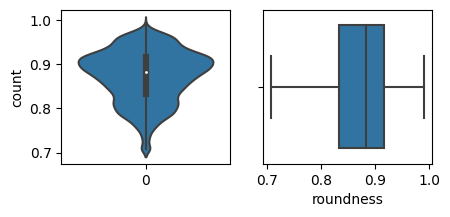

Compactness
Skewness :  0.018


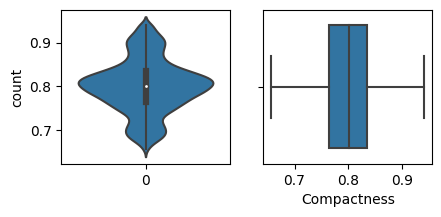

ShapeFactor1
Skewness :  -0.333


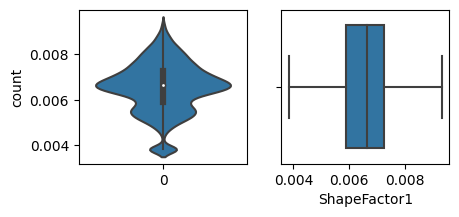

ShapeFactor2
Skewness :  0.294


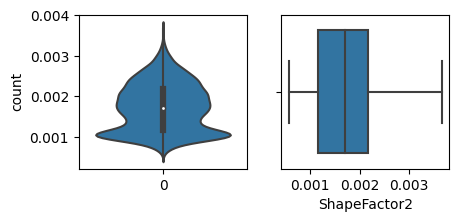

ShapeFactor3
Skewness :  0.191


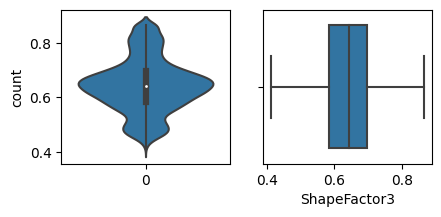

ShapeFactor4
Skewness :  -1.04


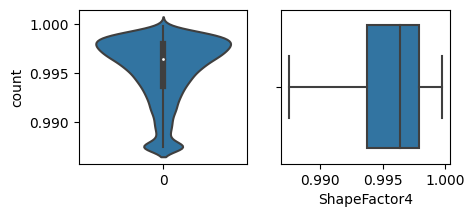

In [246]:
# After removing outliers 

for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.figure(figsize=(10,2))
        plt.subplot(1,4,1)
        sns.violinplot(df[i])
        plt.ylabel('count')
        plt.subplot(1,4,2)
        sns.boxplot(x=df[i])
        plt.show() 

## Izbacivanje visoko korelisanih fičera

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'Area'),
  Text(1.5, 0, 'Perimeter'),
  Text(2.5, 0, 'MajorAxisLength'),
  Text(3.5, 0, 'MinorAxisLength'),
  Text(4.5, 0, 'AspectRation'),
  Text(5.5, 0, 'Eccentricity'),
  Text(6.5, 0, 'ConvexArea'),
  Text(7.5, 0, 'EquivDiameter'),
  Text(8.5, 0, 'Extent'),
  Text(9.5, 0, 'Solidity'),
  Text(10.5, 0, 'roundness'),
  Text(11.5, 0, 'Compactness'),
  Text(12.5, 0, 'ShapeFactor1'),
  Text(13.5, 0, 'ShapeFactor2'),
  Text(14.5, 0, 'ShapeFactor3'),
  Text(15.5, 0, 'ShapeFactor4'),
  Text(16.5, 0, 'Class')])

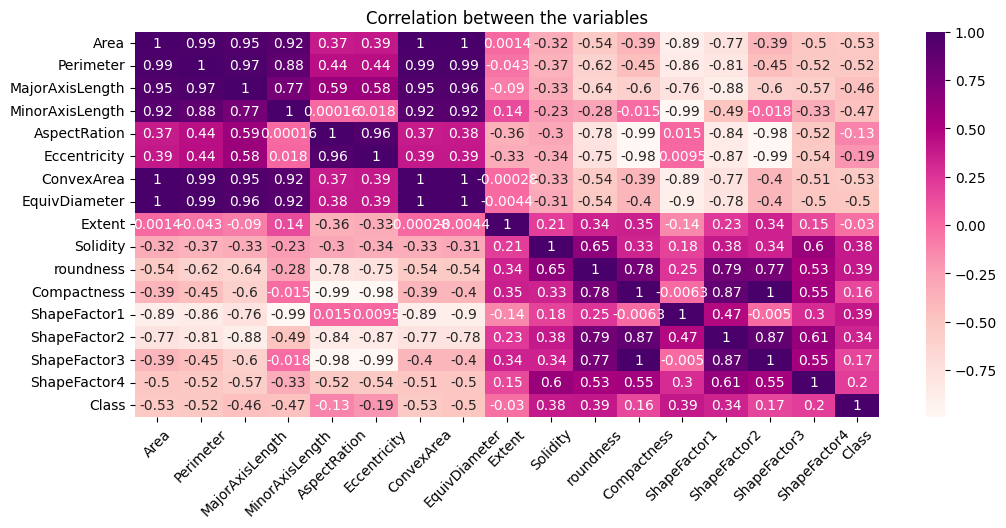

In [247]:
plt.subplots(figsize=(12,5))    #korelacija izmedju podataka
gender_correlation=df.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

In [248]:
# df = pd.DataFrame(df, columns=df.columns[:16])

# columns_to_drop = ['ConvexArea', 'EquivDiameter', 'ShapeFactor3']
# df.drop(columns=columns_to_drop, inplace=True)

## Podela train i test skupova

In [249]:
from sklearn.model_selection import train_test_split

data=df.values
X=data[:,0:16]
y=data[:,16]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(X_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(X_test)}")

Broj uzoraka u trening skupu podataka: 9480
Broj uzoraka u test skupu podataka: 4063


In [250]:
from lazypredict.Supervised import LazyClassifier
# Creating the LazyClassifier object
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [251]:
# Fitting the model on the training data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 28/29 [00:33<00:00,  1.10it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 9480, number of used features: 16
[LightGBM] [Info] Start training from score -2.328228
[LightGBM] [Info] Start training from score -3.296153
[LightGBM] [Info] Start training from score -2.101627
[LightGBM] [Info] Start training from score -1.345371
[LightGBM] [Info] Start training from score -2.022049
[LightGBM] [Info] Start training from score -1.872119
[LightGBM] [Info] Start training from score -1.626460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

100%|██████████| 29/29 [00:35<00:00,  1.21s/it]


In [252]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.93               0.94    None      0.93   
LogisticRegression                 0.92               0.93    None      0.92   
XGBClassifier                      0.92               0.93    None      0.92   
RandomForestClassifier             0.92               0.93    None      0.92   
KNeighborsClassifier               0.92               0.93    None      0.92   
LGBMClassifier                     0.92               0.93    None      0.92   
CalibratedClassifierCV             0.92               0.93    None      0.92   
LinearSVC                          0.92               0.93    None      0.92   
ExtraTreesClassifier               0.92               0.93    None      0.92   
BaggingClassifier                  0.92               0.93    None      0.92   
SGDClassifier                      0.91 

## Linearni SVC

In [253]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

svc_model = LinearSVC(random_state=0)

pred = svc_model.fit(X_train, y_train).predict(X_test)

print("LinearSVC accuracy : ",accuracy_score(y_test, pred, normalize = True))
report = classification_report(y_test,pred, digits=5)

LinearSVC accuracy :  0.5434408072852572


## DECISION TREE

In [254]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

stdscalar=StandardScaler()
X_train=stdscalar.fit_transform(X_train)
X_test=stdscalar.transform(X_test)
dtree=DecisionTreeClassifier(ccp_alpha=0, criterion='entropy',
                       min_samples_split=3, random_state=0,max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=4,
                       min_samples_split=3, random_state=0)

In [255]:
from sklearn.metrics import accuracy_score
pred_dtree=dtree.predict(X_test)
accuracy_score(y_test,pred_dtree)

0.8528181146935762

In [256]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dtree, X, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 86.35%


              precision    recall  f1-score   support

         0.0       0.83      0.67      0.74       398
         1.0       1.00      0.99      1.00       171
         2.0       0.79      0.88      0.83       471
         3.0       0.96      0.77      0.85      1077
         4.0       0.91      0.95      0.93       605
         5.0       0.92      0.89      0.91       569
         6.0       0.70      0.91      0.79       772

    accuracy                           0.85      4063
   macro avg       0.87      0.87      0.86      4063
weighted avg       0.87      0.85      0.85      4063



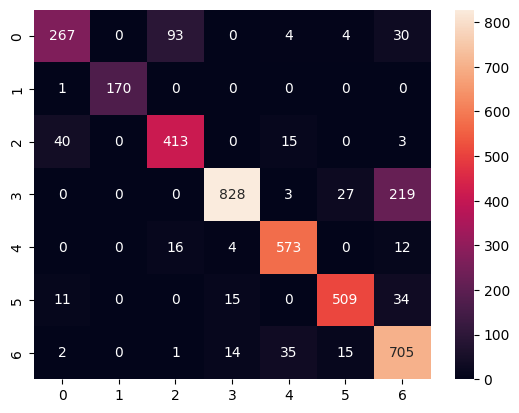

In [257]:
from sklearn.metrics import classification_report
cm=pd.DataFrame(confusion_matrix(y_test, pred_dtree))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred_dtree))
plt.show()

In [258]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_dtree))

Mean Absolute error of decision tree 0.38419886783165147


[Text(0.5, 0.9, 'x[2] <= 0.143\nentropy = 2.643\nsamples = 9480\nvalue = [924, 351, 1159, 2469, 1255, 1458, 1864]'),
 Text(0.25, 0.7, 'x[12] <= 0.325\nentropy = 1.742\nsamples = 5827\nvalue = [87, 0, 6, 2469, 96, 1455, 1714]'),
 Text(0.125, 0.5, 'x[11] <= 0.787\nentropy = 1.441\nsamples = 2962\nvalue = [86, 0, 6, 161, 5, 1423, 1281]'),
 Text(0.0625, 0.3, 'x[6] <= -0.424\nentropy = 0.954\nsamples = 1521\nvalue = [62, 0, 4, 119, 5, 70, 1261]'),
 Text(0.03125, 0.1, 'entropy = 1.282\nsamples = 334\nvalue = [1, 0, 0, 119, 0, 23, 191]'),
 Text(0.09375, 0.1, 'entropy = 0.6\nsamples = 1187\nvalue = [61, 0, 4, 0, 5, 47, 1070]'),
 Text(0.1875, 0.3, 'x[1] <= 0.037\nentropy = 0.431\nsamples = 1441\nvalue = [24, 0, 2, 42, 0, 1353, 20]'),
 Text(0.15625, 0.1, 'entropy = 0.309\nsamples = 1407\nvalue = [0, 0, 1, 42, 0, 1344, 20]'),
 Text(0.21875, 0.1, 'entropy = 1.012\nsamples = 34\nvalue = [24, 0, 1, 0, 0, 9, 0]'),
 Text(0.375, 0.5, 'x[1] <= -0.72\nentropy = 0.898\nsamples = 2865\nvalue = [1, 0, 0, 23

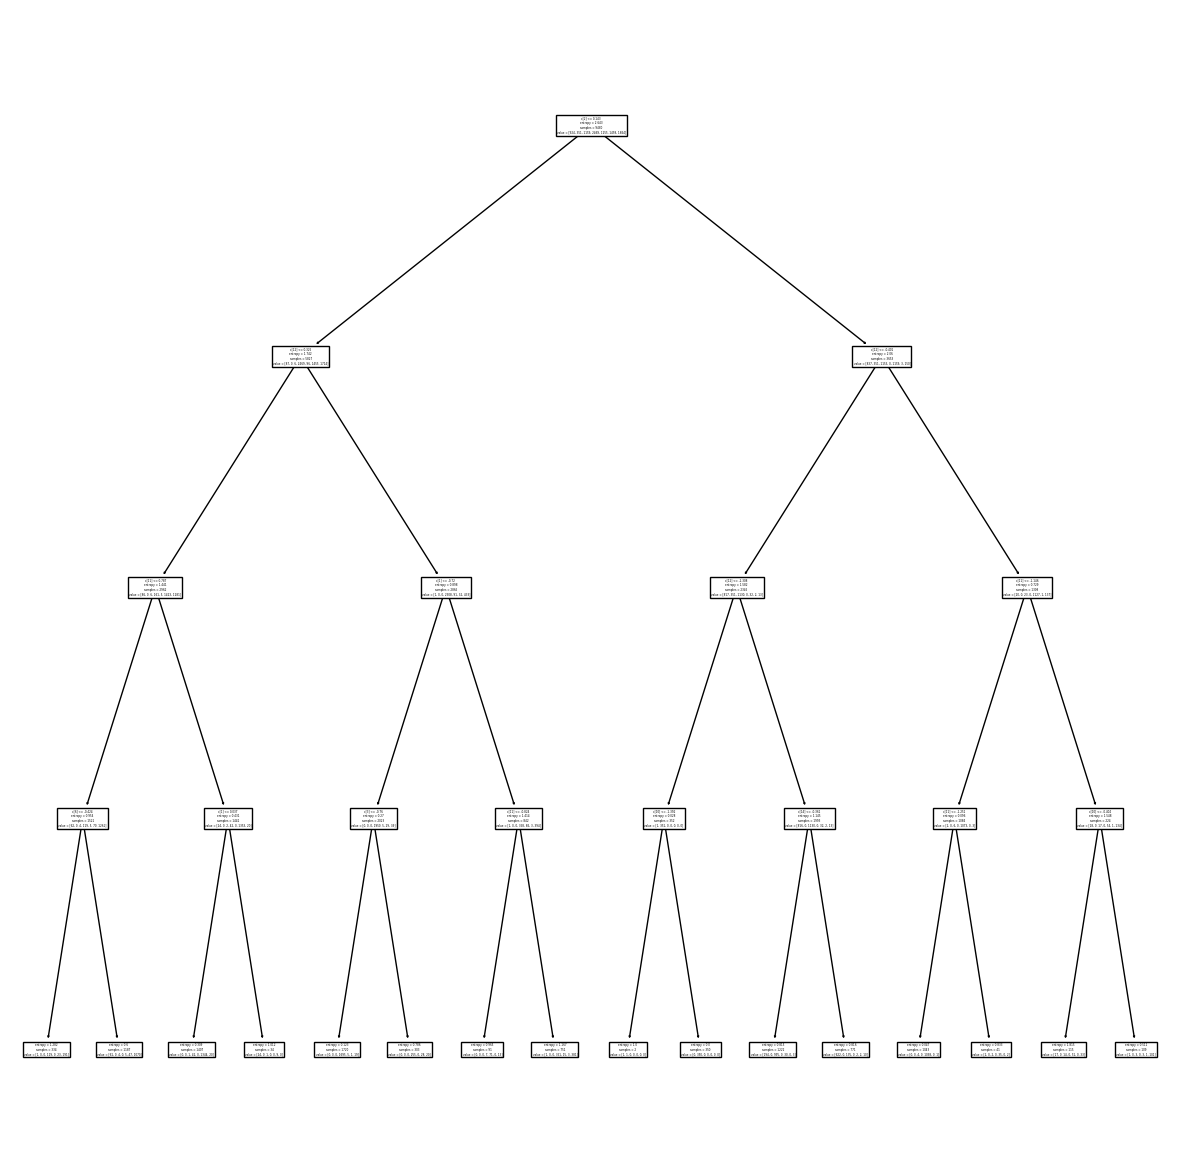

In [259]:
plt.figure(figsize=(15,15))
from sklearn import tree
tree.plot_tree(dtree)

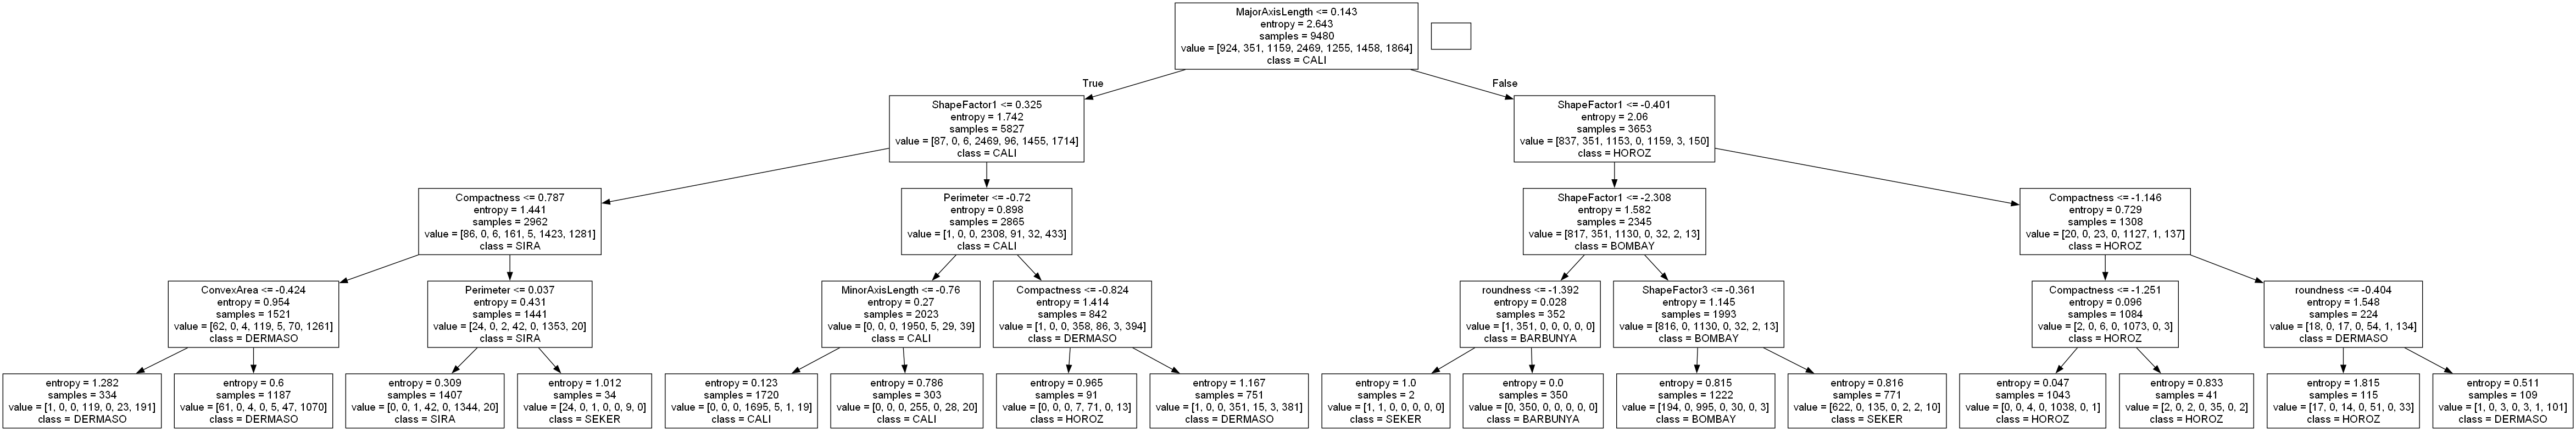

In [260]:
import pydotplus
from sklearn import tree
from IPython.display import Image

cols = [col for col in df.columns if col not in ['Class']]
data_features = df[cols]
dot_data = tree.export_graphviz(dtree,
 out_file=None,
feature_names=data_features.columns,
 class_names=['SEKER','BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASO'])

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_graphviz_executables({'dot': 'C:/Program Files/Graphviz/bin/dot.exe'})  # Putanja na Eminom racunaru

Image(graph.create_png())

## RANDOM FOREST

In [261]:
from sklearn.ensemble import RandomForestClassifier
rfe=RandomForestClassifier()
rfeModel = rfe.fit(X_train,y_train)

In [262]:
pred_rfe=rfe.predict(X_test)
accuracy_score(y_test,pred_rfe)

0.9212404627122815

In [263]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rfe, X, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 92.38%


              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92       398
         1.0       0.99      1.00      1.00       171
         2.0       0.92      0.94      0.93       471
         3.0       0.92      0.93      0.92      1077
         4.0       0.96      0.94      0.95       605
         5.0       0.93      0.96      0.94       569
         6.0       0.87      0.86      0.86       772

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



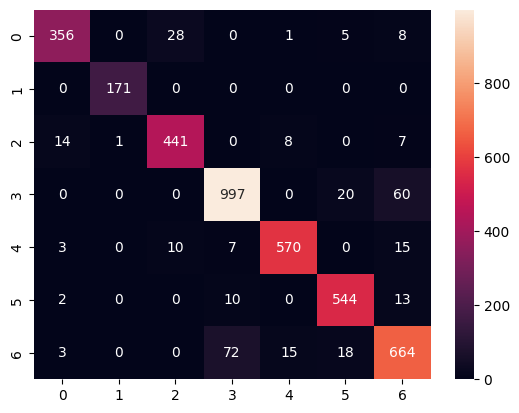

In [264]:
con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d')
print(classification_report(y_test, pred_rfe))
plt.show()

In [265]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_rfe))

Mean Absolute error of decision tree 0.20182131429977848


## Optimizacija RF modela izborom relevantnih atributa

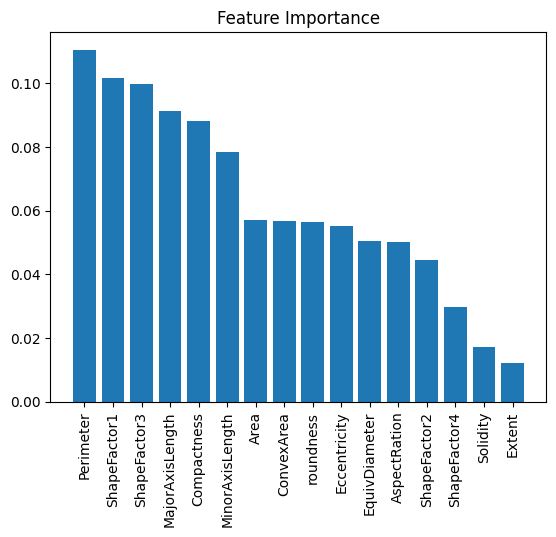

In [266]:
importances = rfeModel.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data_features.columns[i] for i in indices]

plt.figure()

plt.title("Feature Importance")

plt.bar(range(X_train.shape[1]), importances[indices])

plt.xticks(range(X_train.shape[1]), names, rotation=90)

plt.show()

In [267]:
from sklearn.feature_selection import SelectFromModel


def selectFeaturesRF(th):
    selector = SelectFromModel(rfe, threshold=th) 

    features_important = selector.fit_transform(X_train, y_train)

    test_important = selector.transform(X_test)

    randomForestModel = rfe.fit(features_important, y_train)

    predRFC = randomForestModel.predict(test_important)

    print("RandomForest accuracy : ",accuracy_score(y_test, predRFC, normalize = True))
    print(confusion_matrix(y_test, predRFC))
    report = classification_report(y_test,predRFC, digits=5)

    return accuracy_score(y_test, predRFC)

accRFopt = selectFeaturesRF(0.02)

RandomForest accuracy :  0.9163179916317992
[[352   0  29   0   2   6   9]
 [  0 171   0   0   0   0   0]
 [ 18   0 438   0   9   0   6]
 [  0   0   0 992   0  20  65]
 [  2   0  11   6 569   0  17]
 [  2   0   0  11   0 541  15]
 [  3   0   1  78  15  15 660]]


## SVM

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler 

np.set_printoptions(edgeitems=127)

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(X_train)
X_test=stdscaler.transform(X_test)

svm = SVC(C=10,kernel='rbf', gamma=0.1)
svm.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [269]:
pred_svm=svm.predict(X_test)
print(accuracy_score(y_test,pred_svm))

0.9335466404134876


In [270]:
# from sklearn.model_selection import cross_val_score, KFold

# cv = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(svm, X, y, cv=cv, scoring='accuracy')
# average_cv_accuracy = cv_scores.mean()
# print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

In [271]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_svm))

Mean Absolute error of decision tree 0.1752399704651735


              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       398
         1.0       1.00      1.00      1.00       171
         2.0       0.94      0.96      0.95       471
         3.0       0.92      0.94      0.93      1077
         4.0       0.96      0.94      0.95       605
         5.0       0.94      0.96      0.95       569
         6.0       0.88      0.88      0.88       772

    accuracy                           0.93      4063
   macro avg       0.95      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



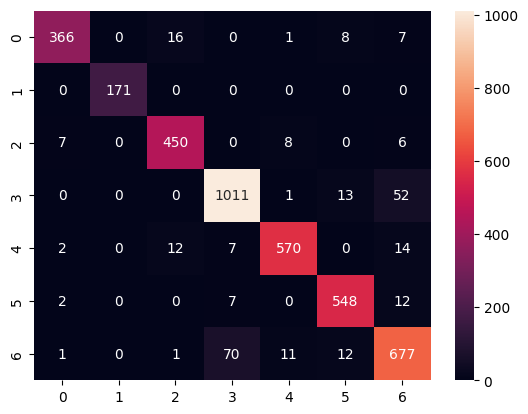

In [272]:
cm=pd.DataFrame(confusion_matrix(y_test, pred_svm))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred_svm))
plt.show()

## LOGISTIC REGRESSION

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

lr=LogisticRegression(C=10)
stdscalar=StandardScaler()
X_train=stdscalar.fit_transform(X_train)
X_test=stdscalar.transform(X_test)

lr.fit(X_train,y_train)

LogisticRegression(C=10)

In [274]:
lr.score(X_test, y_test)

0.9261629337927639

In [275]:
pred_lr=lr.predict(X_test)
accuracy_score(y_test, pred_lr)

0.9261629337927639

In [276]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, pred_lr))

0.19492985478710312


              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       398
         1.0       1.00      0.99      1.00       171
         2.0       0.92      0.95      0.94       471
         3.0       0.93      0.92      0.92      1077
         4.0       0.96      0.94      0.95       605
         5.0       0.95      0.95      0.95       569
         6.0       0.85      0.89      0.87       772

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063


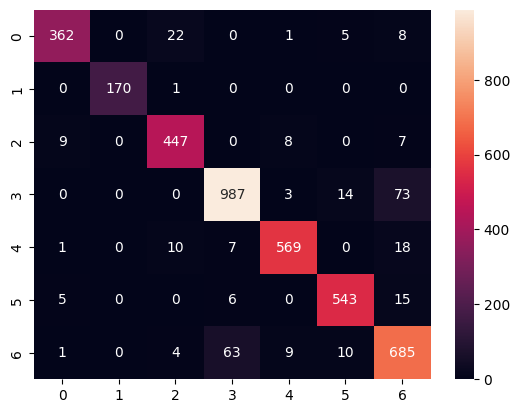

In [277]:
cm=pd.DataFrame(confusion_matrix(y_test, pred_lr))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred_lr))
plt.show()

## NAIVE BAYES CLASSIFIER

In [278]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [279]:
pred_nb=gnb.predict(X_test)
accuracy_score(y_test,pred_nb)

0.9010583312823037

In [280]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gnb, X, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 76.73%


              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84       398
         1.0       1.00      0.99      0.99       171
         2.0       0.87      0.92      0.89       471
         3.0       0.94      0.88      0.91      1077
         4.0       0.95      0.95      0.95       605
         5.0       0.93      0.93      0.93       569
         6.0       0.81      0.89      0.85       772

    accuracy                           0.90      4063
   macro avg       0.91      0.91      0.91      4063
weighted avg       0.90      0.90      0.90      4063



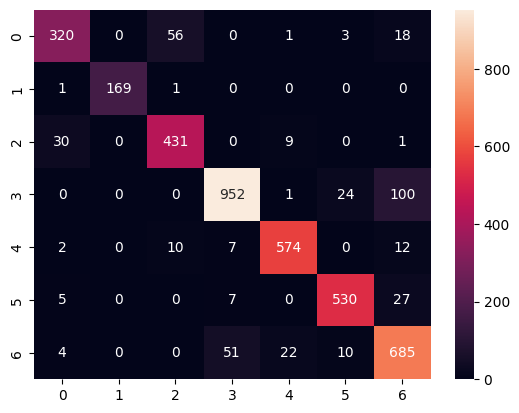

In [281]:
conm=pd.DataFrame(confusion_matrix(y_test, pred_nb))
sns.heatmap(conm, annot=True, fmt='d')
print(classification_report(y_test, pred_nb))
plt.show()

In [282]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_nb))

Mean Absolute error of decision tree 0.25301501353679545


## KNN

In [283]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

In [284]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn_clf_sk_3 = KNeighborsClassifier(n_neighbors=3)
knn_clf_sk_3.fit(X_train, y_train)
knn_clf_sk_3.score(X_test, y_test)

0.9187792271720404

In [285]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_clf_sk_3, X_scaled, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 91.88%


KNeighbors accuracy :  0.9187792271720404
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93       398
         1.0       0.99      1.00      1.00       171
         2.0       0.92      0.94      0.93       471
         3.0       0.91      0.92      0.91      1077
         4.0       0.96      0.93      0.94       605
         5.0       0.95      0.95      0.95       569
         6.0       0.85      0.86      0.85       772

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



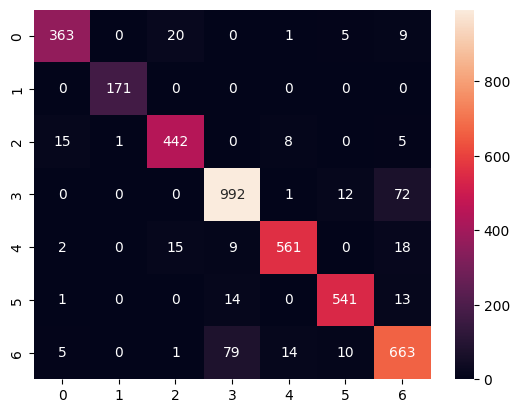

In [286]:
nnModel = knn_clf_sk_3.fit(X_train, y_train)

predNN = nnModel.predict(X_test)

print("KNeighbors accuracy : ",accuracy_score(y_test, predNN, normalize = True))

conm=pd.DataFrame(confusion_matrix(y_test, predNN))
sns.heatmap(conm, annot=True, fmt='d')
print(classification_report(y_test, predNN))
plt.show()

In [287]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, predNN))

Mean Absolute error of decision tree 0.21388136844696037


## Poredjenje rezultata

In [288]:
print('Decision tree: ',(dtree.score(X_test, y_test)*100), '%')
print('\n')
print('KNN: ',(knn_clf_sk_3.score(X_test, y_test)*100),'%')
print('\n')
print('Random Forest:', (accRFopt) * 100)
print('\n')
print('Naive Bayes Classifier: ', (gnb.score(X_test, y_test)*100),'%')
print('\n')
print('Logistic Regresion: ', (lr.score(X_test, y_test)*100),'%')
print('\n')
print('SVM: ', (svm.score(X_test, y_test)*100),'%')

Decision tree:  85.28181146935762 %




KNN:  91.87792271720404 %


Random Forest: 91.63179916317992


Naive Bayes Classifier:  90.10583312823037 %


Logistic Regresion:  92.6162933792764 %


SVM:  93.35466404134876 %


## UnderSampling

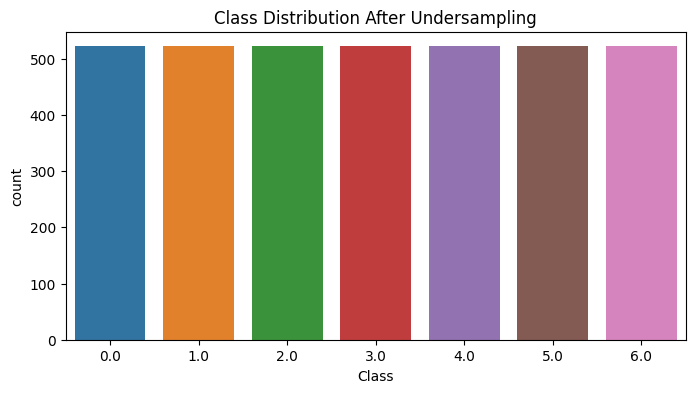

In [289]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
Numeric_cols = df.drop(columns=['Class']).columns
df_resampled = pd.DataFrame(X_resampled, columns=Numeric_cols)
df_resampled["Class"] = y_resampled

# Plot the class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=df_resampled)
plt.title("Class Distribution After Undersampling")
plt.show()

## RF UnderSampled

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Random forest after undersampling: {accuracy*100:.10f}")
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

cv_scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

Random forest after undersampling: 93.4336525308

Cross-validated Accuracy:
Fold 1: 92.75%
Fold 2: 91.93%
Fold 3: 94.39%
Fold 4: 93.02%
Fold 5: 91.92%

Average Cross-validated Accuracy: 92.80%


## DT UnderSampled

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Decision Tree after undersampling: {accuracy*100:.10f}")
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

cv_scores = cross_val_score(dt_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

Decision Tree after undersampling: 90.9712722298

Cross-validated Accuracy:
Fold 1: 88.78%
Fold 2: 89.88%
Fold 3: 89.74%
Fold 4: 91.24%
Fold 5: 91.10%

Average Cross-validated Accuracy: 90.15%


## SMOTE OverSampling

In [292]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Split the dataset into training and testing sets
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
X = df.drop('Class', axis=1)
y = df['Class']

print("Before OverSampling, counts of 'DERMASON': {}".format(sum(y == 'DERMASON')))
print("Before OverSampling, counts of 'SIRA': {}".format(sum(y == 'SIRA')))
print("Before OverSampling, counts of 'SEKER': {}".format(sum(y == 'SEKER')))
print("Before OverSampling, counts of 'HOROZ': {}".format(sum(y == 'HOROZ')))
print("Before OverSampling, counts of 'CALI': {}".format(sum(y == 'CALI')))
print("Before OverSampling, counts of 'BARBUNYA': {}".format(sum(y == 'BARBUNYA')))
print("Before OverSampling, counts of 'BOMBAY': {}\n".format(sum(y == 'BOMBAY')))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y.ravel())

print("After OverSampling, counts of 'DERMASON': {}".format(sum(y_res == 'DERMASON')))
print("After OverSampling, counts of 'SIRA': {}".format(sum(y_res == 'SIRA')))
print("After OverSampling, counts of 'SEKER': {}".format(sum(y_res == 'SEKER')))
print("After OverSampling, counts of 'HOROZ': {}".format(sum(y_res == 'HOROZ')))
print("After OverSampling, counts of 'CALI': {}".format(sum(y_res == 'CALI')))
print("After OverSampling, counts of 'BARBUNYA': {}".format(sum(y_res == 'BARBUNYA')))
print("After OverSampling, counts of 'BOMBAY': {}\n".format(sum(y_res == 'BOMBAY')))

Before OverSampling, counts of 'DERMASON': 3546
Before OverSampling, counts of 'SIRA': 2636
Before OverSampling, counts of 'SEKER': 2027
Before OverSampling, counts of 'HOROZ': 1928
Before OverSampling, counts of 'CALI': 1630
Before OverSampling, counts of 'BARBUNYA': 1322
Before OverSampling, counts of 'BOMBAY': 522

After OverSampling, counts of 'DERMASON': 3546
After OverSampling, counts of 'SIRA': 3546
After OverSampling, counts of 'SEKER': 3546
After OverSampling, counts of 'HOROZ': 3546
After OverSampling, counts of 'CALI': 3546
After OverSampling, counts of 'BARBUNYA': 3546
After OverSampling, counts of 'BOMBAY': 3546



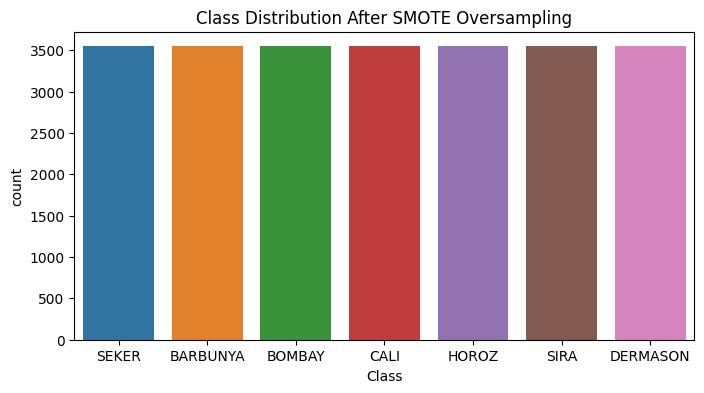

In [293]:
import seaborn as sns
# Create a new DataFrame with the resampled data
Numeric_cols = df.drop(columns=['Class']).columns
df_resampled = pd.DataFrame(X_res, columns=Numeric_cols)
df_resampled["Class"] = y_res

# Plot the class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=df_resampled)
plt.title("Class Distribution After SMOTE Oversampling")
plt.show()

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize numerical values into ranges
scaler = MinMaxScaler()

# Select the columns you want to scale
columns_to_scale =  df.columns[:-1]

# Fit the scaler on the selected columns
scaler.fit(df[columns_to_scale])

# Transform the selected columns using the scaler
df[columns_to_scale] = scaler.transform(df[columns_to_scale])

In [295]:
# from lazypredict.Supervised import LazyClassifier
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)

# print(models)

## RF OverSampled

In [296]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the dataset into training and testing sets
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
x_data = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

# Train a model using the selected features
rf_selected = RandomForestClassifier()
rf_selected.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(rf_selected, X_train, y_train, cv=7)  # Specify the number of folds (e.g., 5-fold CV)

# Evaluate the model on the test set
accuracy = rf_selected.score(X_test, y_test)
formatted_accuracy = format(accuracy, '.0%')
print("Accuracy (without cross-validation):", formatted_accuracy)

#X_merged_df = X_train.append(X_test)
#y_merged_df = y_train.append(y_test)

X_merged_df = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = pd.concat([y_train, y_test], axis=0, ignore_index=True)

# Perform cross-validation
cv_scores = cross_val_score(rf_selected, X_merged_df, y_merged_df, cv=5)  # Use 5-fold cross-validation
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.0%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 92%
Cross-validated Accuracy: 92%


## KNN OverSampled

In [297]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_data = df.drop('Class', axis=1)
y = df['Class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3, random_state=42)

# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the KNN model
accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.0%')
print("Accuracy (without cross-validation):", formatted_accuracy)

#X_merged_df = X_train.append(X_test)
#y_merged_df = y_train.append(y_test)

X_merged_df = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = pd.concat([y_train, y_test], axis=0, ignore_index=True)

# Perform cross-validation
cv_scores = cross_val_score(knn, X_merged_df, y_merged_df, cv=5)  # Use 5-fold cross-validation
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.0%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 72%
Cross-validated Accuracy: 73%


## DT OverSampled

In [298]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
x_data = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the accuracy of the Decision Tree model
accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.0%')
print("Accuracy (without cross-validation):", formatted_accuracy)

#X_merged_df = X_train.append(X_test)
#y_merged_df = y_train.append(y_test)

X_merged_df = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = pd.concat([y_train, y_test], axis=0, ignore_index=True)

# Perform cross-validation
cv_scores = cross_val_score(dt_model, X_merged_df, y_merged_df, cv=5)  # Use 5-fold cross-validation
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.0%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 89%
Cross-validated Accuracy: 89%


In [299]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Split the dataset into training and testing sets
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
X = df.drop('Class', axis=1)
y = df['Class']

print("Before OverSampling, counts of 'DERMASON': {}".format(sum(y == 'DERMASON')))
print("Before OverSampling, counts of 'SIRA': {}".format(sum(y == 'SIRA')))
print("Before OverSampling, counts of 'SEKER': {}".format(sum(y == 'SEKER')))
print("Before OverSampling, counts of 'HOROZ': {}".format(sum(y == 'HOROZ')))
print("Before OverSampling, counts of 'CALI': {}".format(sum(y == 'CALI')))
print("Before OverSampling, counts of 'BARBUNYA': {}".format(sum(y == 'BARBUNYA')))
print("Before OverSampling, counts of 'BOMBAY': {}\n".format(sum(y == 'BOMBAY')))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y.ravel())

print("After OverSampling, counts of 'DERMASON': {}".format(sum(y_res == 'DERMASON')))
print("After OverSampling, counts of 'SIRA': {}".format(sum(y_res == 'SIRA')))
print("After OverSampling, counts of 'SEKER': {}".format(sum(y_res == 'SEKER')))
print("After OverSampling, counts of 'HOROZ': {}".format(sum(y_res == 'HOROZ')))
print("After OverSampling, counts of 'CALI': {}".format(sum(y_res == 'CALI')))
print("After OverSampling, counts of 'BARBUNYA': {}".format(sum(y_res == 'BARBUNYA')))
print("After OverSampling, counts of 'BOMBAY': {}\n".format(sum(y_res == 'BOMBAY')))

Before OverSampling, counts of 'DERMASON': 3546
Before OverSampling, counts of 'SIRA': 2636
Before OverSampling, counts of 'SEKER': 2027
Before OverSampling, counts of 'HOROZ': 1928
Before OverSampling, counts of 'CALI': 1630
Before OverSampling, counts of 'BARBUNYA': 1322
Before OverSampling, counts of 'BOMBAY': 522

After OverSampling, counts of 'DERMASON': 3546
After OverSampling, counts of 'SIRA': 3546
After OverSampling, counts of 'SEKER': 3546
After OverSampling, counts of 'HOROZ': 3546
After OverSampling, counts of 'CALI': 3546
After OverSampling, counts of 'BARBUNYA': 3546
After OverSampling, counts of 'BOMBAY': 3546



## Podešavanje hiperparametara

## SVC

In [116]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn import decomposition

# svc_model = SVC()
# hyperparameters = {'C': np.logspace(0,4,10), 
#               'gamma': np.logspace(0,4,10,base=0.1),
#              'kernel': ['rbf','poly','sigmoid']}
                 
# rnd_search_cv = RandomizedSearchCV(svc_model,hyperparameters, cv=3, verbose=2, n_iter=100, random_state=1,
#  n_jobs=-1)
# best_SVC_model = rnd_search_cv.fit(X_train,y_train)
# best_SVC_pred = best_SVC_model.predict(X_test)

# print("Best SVC accuracy : ",accuracy_score(y_test, best_SVC_pred, normalize = True))
# print(confusion_matrix(y_test, best_SVC_pred))
# report = classification_report(y_test,best_SVC_pred, digits=5)

## DT

In [300]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#param = {
#    'criterion': ['gini'],
#    'max_depth': [i for i in range(20, 101, 10)], # [30, 50, 60, 100]
#    'min_samples_leaf': [i for i in range(2, 11, 1)], # [2, 3, 5, 10]
#    'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5] # [0.1, 0.2, 0.5]
#}

param = {'max_depth': [3, 5, 7, 9, 12, 15, 17], 'min_samples_leaf': [10, 50, 100, 150, 250, 300]}
# param = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [i for i in range(3, 10)],
#     'min_samples_leaf': [i for i in range(1, 6)],
#     'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5]
# }
#grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6) # default scoring: accuracy_score
grid= GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=5)
grid.fit(X_train, y_train)
print('\n Best DT Classifier:', grid.best_params_, '\n\Best Score:', grid.best_score_)  


 Best DT Classifier: {'max_depth': 15, 'min_samples_leaf': 10} 
\Best Score: 0.9059505988181813


## RF

In [305]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param = {'max_depth': [15, 17, 20], 'min_samples_leaf': [10],
     'n_estimators': [100, 200, 300]}

grid= GridSearchCV(RandomForestClassifier(), param_grid=param, cv=5)
grid.fit(X_train, y_train)
print('\n Best RF Classifier:', grid.best_params_, '\n\Best Score:', grid.best_score_)  


 Best RF Classifier: {'max_depth': 17, 'min_samples_leaf': 10, 'n_estimators': 300} 
\Best Score: 0.921381139241414
